<a href="https://colab.research.google.com/github/GabrielleRab/SRMPmachine/blob/main/K_means_exoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Classifying exoplanets with k-means clustering** 

### **Step 1:** Identify your question

Over 4200 exoplanets have been detected so far, and they vary widely in characteristics. 

Using Jupiter as a reference point, we will investigate how similar all known exoplanets are to Jupiter, and whether or not we classify them based on that similarity using machine learning.

We will form groups of exoplanets based on their characteristic features, where most similar planets will be grouped together. 

### **Step 2:** Select your data

The dataset for this activity came from the NASA Exoplanet Archive and is a composite of data from several different sources.

We will be looking at a number of features of exoplanets. As a reminder, here is a definition of each column in the dataset:

*   pl_name: Planet Name
*   discoverymethod: Discovery Method
*   disc_year: Discovery Year
*   pl_orbper:      Orbital Period [days]
*   pl_orbsmax:     Orbit Semi-Major Axis [au]
*   pl_radj:        Planet Radius [Jupiter Radius]
*   pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]
*   pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance
*   st_teff:        Stellar Effective Temperature [K]
*   st_rad:         Stellar Radius [Solar Radius]
*   st_mass:        Stellar Mass [Solar mass]
*   sy_dist:        Distance [pc]

Let's load the data into the colab and take a look. Run the cell below to create a dataframe (table) of our data and preview the first five rows:

In [2]:
# import the necessary Python libraries
import pandas as pd

# create a dataframe called "df" with the dataset
df = pd.read_csv("https://raw.githubusercontent.com/GabrielleRab/SRMPmachine/main/datasets/exoplanets_cleaned.csv")

# preview the first five rows
df.head()

,pl_name,discoverymethod,disc_year,pl_orbper,pl_orbsmax,pl_radj,pl_bmassj,pl_bmassprov,st_teff,st_rad,st_mass,sy_dist
0,HD 97048 b,Disk Kinematics,2019,NaN,130.00,1.18,2.5000,Mass,10000.0,2.25,2.40,183.857000
1,2MASS J19383260+4603591 b,Eclipse Timing Variations,2015,416.0,0.92,1.20,1.9000,Mass,10868.0,0.34,0.48,396.332000
2,DE CVn b,Eclipse Timing Variations,2018,4098.1,5.75,1.10,12.0293,Msin(i)/sin(i),3579.0,0.42,0.51,30.522500
3,DP Leo b,Eclipse Timing Variations,2009,10220.0,8.19,1.14,6.2800,Mass,13500.0,0.01,0.69,305.684000
4,HU Aqr AB b,Eclipse Timing Variations,2011,2390.0,3.60,1.14,5.9000,Msin(i)/sin(i),5952.0,NaN,0.88,192.198079


We will be focusing on the pl_orbper (orbital period, or how long it takes the exoplanet to orbit its star in days) and pl_massj (exoplanet mass relative to Jupiter)

Run the code below to find out how many rows are in our dataset. Each row represents an exoplanet that has been identified.

In [3]:
# return the number of rows in the dataset
len(df)

4925

### **Step 3:** Choose your method

We will use k-means clustering to determine the main types of exoplanets, relative to Jupiter. This is an unsupervised method because we do not have any exoplanets that we have already classified (or put another way, we have unlabeled data). K-means clustering is an algorithm used to group unlabelled datasets based on their feature similarities. 

Run the code below to import the necessary Python libraries for k-means clustering.

In [4]:
# import necessary Python libraries
import pylab as plt
import numpy as np
from scipy import stats

import matplotlib.pyplot as mplt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### **Step 4:** Prepare your data



Our dataset has some missing values of pl_orbper or pl_massj\. Run the code below to remove any rows with missing values in pl_orbper or pl_massj. We can do this because we will not be able to analyze any exoplanet without both a calculated orbital period and mass. We do not need to remove exoplanets with other missing values because those values are not relevant for our analysis and by removing them we might remove some exoplanets that we can analyze. 

In [5]:
# remove rows with missing values
df_clean = df.dropna(subset=['pl_orbper', 'pl_bmassj'])

Let's see how many exoplanets are left in our dataset from the initial 4925.

In [6]:
# return the number of rows in the dataset
len(df_clean)

4759

Why do you think some exoplanets are missing values for orbital period and mass? How can you check to see how many were removed?

Now run the code below to select only the columns we wish to include in our analysis

In [7]:
# create a dataframe with only the orbital period and mass
x = df_clean.iloc[:, [3,6]].values

Let's examine the distribution of pl_orber and pl_bmassj to examine the data distrubiton. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


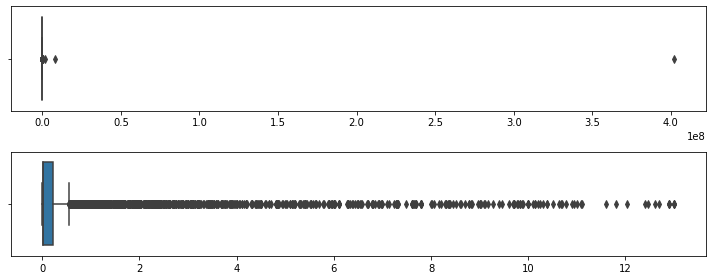

In [8]:
# plt.boxplot(x[:, 0])
fig, axs = plt.subplots(2, figsize = (10,4))
plt1 = sns.boxplot(x[:, 0], ax = axs[0])
plt2 = sns.boxplot(x[:, 1], ax = axs[1])
plt.tight_layout()

**Bias Alert!** There seem to be many outliers in both variables which can influence the results of the k-mean model, which is a model that is very sensitive to outliers. Let's remove the outliers and clean the dataset.

In [9]:
#remove outliers
#99.7% of the data points lie between +/- 3 standard deviation. If data lies outside this range, it is usually considered an outlier. 
x_clean = x[(np.abs(stats.zscore(x)) < 3).all(axis=1)]
x_clean.size

9218

Let's plot the boxplots again to examine the distribution of the dataset when the worst outliers are removed. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


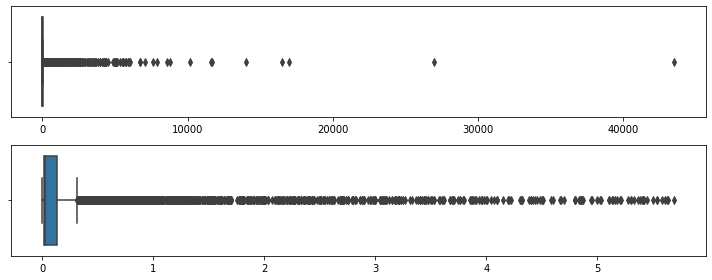

In [10]:
# plt.boxplot(x_clean[:, 0])
fig, axs = plt.subplots(2, figsize = (10,4))
plt1 = sns.boxplot(x_clean[:, 0], ax = axs[0])
plt2 = sns.boxplot(x_clean[:, 1], ax = axs[1])
plt.tight_layout()

Let's look at the overall distribution of our data:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


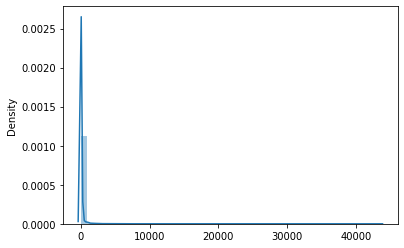

In [11]:
# Plot distribution
sns.distplot(x_clean)

**Bias Alert!** Our data is left-skewed. (statistical bias) This means that most of our data is in the lower end of our data range with only a few data points at the higher end of the range. 

Let's plot the log transformed values of our variables to see if that improves the distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


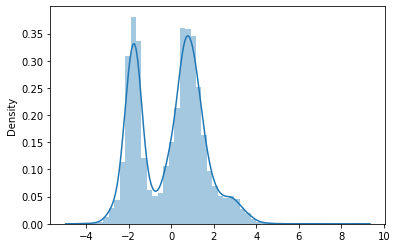

In [14]:
# scale the data using log10
logx =  np.log10(x)

# plot the distribution
sns.distplot(logx)

By doing a log transofrmation of our data, we have created a less skewed distribution of our dataset. The log scaled values sometimes yield negative values. These indicate negative powers, and not negative values of the variables themselves. 

### **Step 5:** Use the model

Now it's time to make our k-means classifier. We will also need to set the hyperparameters (values that control how the model learns and makes decisions). In this case we will specify the number of clusters as 3.

**Note:** Because k-means clustering is an unsupervised method, we do not need to split our data into a training and a testing set. No data is labeled, so there is no way to train the model.

Run the code below to create the model:

In [15]:
# create the k-means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)


**Bias Alert!** Since we have a pre-specified k of 3, our k-means classifier may cluster non-clustered data. Especially at the borders of clusters, points that are basically toss-ups may be put into one cluster or another. This may especially be a problem if the clusters are very close together. Visualizing the clusters can help us evaluate this risk.

Next we will apply the model to the data:

In [16]:
# fit the model to the data
y_kmeans = kmeans.fit_predict(logx)

Let's compute the size of each cluster that our model formed. 

In [17]:
#Sizes of each cluster 
print(logx[y_kmeans == 0].size)
print(logx[y_kmeans == 1].size)
print(logx[y_kmeans == 2].size)


1266
6830
1422


**Bias Alert!** One cluster is significantly bigger than the other two. This might introduce some inaccuracy in our clustering. K-means clustering will always form clusters of similar areas, but different clusters may have different densities. This might be a problem if one category of exoplanets has many more exoplanets than the others; some of them (especially the outliers) may end up in another cluster. 

Let's visualize the clusters that our model has created. We will add the planets from our solar system for reference:

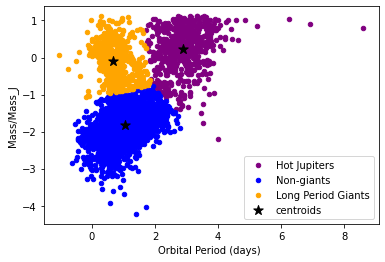

In [18]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

#Visualising the clusters
plt.scatter(logx[y_kmeans == 0, 0], logx[y_kmeans == 0, 1], s = 20, c = 'purple', label = 'Hot Jupiters')
plt.scatter(logx[y_kmeans == 1, 0], logx[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Non-giants')
plt.scatter(logx[y_kmeans == 2, 0], logx[y_kmeans == 2, 1], s = 20, c = 'orange', label = 'Long Period Giants')

#Plotting the centroids of the clusters
# print(kmeans.cluster_centers_)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=100, marker='*',
    c='black', 
    label='centroids'
)

plt.xlabel('Orbital Period (days) ')
plt.ylabel('Mass/Mass_J')
plt.legend()
plt.rcParams["figure.figsize"] = (12,8)


**Bias alert!** Looking at these three clusters, there is no space between them meaning that the borders between clusters may be somewhat arbitrary. Points along the borders should be considered with caution.

That said, we can learn something interesting about how exoplanets relate to Jupiter based on these results. The three clusters may be described as follows:

**Hot Jupiters**: A Jupiter-like planet in terms of mass and radius, but typically found closer to its host star than Jupiter is to the sun. A period of orbit being only 3 days.

**Long period giants**: "Cold Jupiters". Giant planets of a similar mass to Jupiter, located further out in their orbits than Hot Jupiters. A period of orbit of greater than 100 days.

**Non-giants**: Everything else


*Questions for reflection:*

What do you notice about where our solar system's planets are relative to the observed exoplanets? 

Can you explain what you see based on what you know about exoplanet discovery methods?

Let's make a plot of our own solar system planets that we know the location for. Note that we also applied a log transformation to the planets' locations to keep them consistent with the exoplanets' plot. 


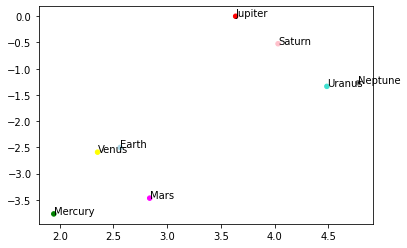

In [22]:
# Data for solar system planets
solars_x = [88, 224.7, 365.2, 687, 4331, 10747, 30589, 59800]
logplanets_x = np.array(np.log10(solars_x)) 
solars_y = [.00017, .00256, .00315, .00034, 1, .299, .046, .054]
logplanets_y = np.array(np.log10(solars_y))

# plotting the solar planets
labels = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
colors = ["green", "yellow", "lightblue", "magenta", "red", "pink", "turquoise", "grey"]
for c, i in enumerate(logplanets_x):
  plt.text(i, logplanets_y[c], labels[c])
plt.scatter(logplanets_x, logplanets_y, s = 20, c = colors)
plt.rcParams["figure.figsize"] = (6,4)
plt.show()


Where would these planets lie in the exoplanets clusters formed? Let's overlap these plots to explore that! 

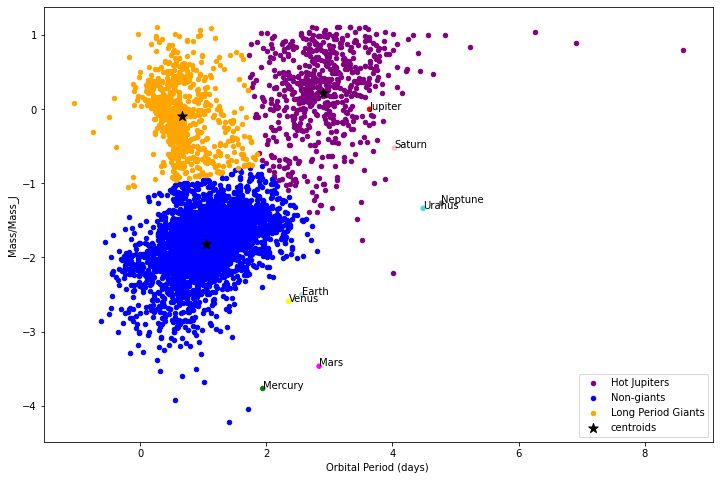

In [24]:
#Visualising the clusters
plt.scatter(logx[y_kmeans == 0, 0], logx[y_kmeans == 0, 1], s = 20, c = 'purple', label = 'Hot Jupiters')
plt.scatter(logx[y_kmeans == 1, 0], logx[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Non-giants')
plt.scatter(logx[y_kmeans == 2, 0], logx[y_kmeans == 2, 1], s = 20, c = 'orange', label = 'Long Period Giants')

#Plotting the centroids of the clusters
# print(kmeans.cluster_centers_)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=100, marker='*',
    c='black', 
    label='centroids'
)

# #Adding our solar system's planets for comparison
# #Adding a log transformation to keep it consistent with the expolanets plot
planets_x = [88, 224.7, 365.2, 687, 4331, 10747, 30589, 59800]
logplanets_x = np.array(np.log10(planets_x)) 
planets_y = [.00017, .00256, .00315, .00034, 1, .299, .046, .054]
logplanets_y = np.array(np.log10(planets_y))

labels = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
colors = ["green", "yellow", "lightblue", "magenta", "red", "pink", "turquoise", "grey"]
for c, i in enumerate(logplanets_x):
  plt.text(i, logplanets_y[c], labels[c])
plt.scatter(logplanets_x, logplanets_y, s = 20, c = colors)

plt.xlabel('Orbital Period (days) ')
plt.ylabel('Mass/Mass_J')
plt.legend()
plt.rcParams["figure.figsize"] = (12,8)
